## Exercise 3: Overfitting and early stopping with Adam

### Description

Run the above simulation with Adam for sufficiently many epochs (be patient!) until you see clear overfitting.

1. Plot the learning curves of a fit with Adam and sufficiently many epochs and answer the questions below.

A simple, but effective mean to avoid overfitting is early stopping, i.e. a fit is not run until convergence but stopped as soon as the validation error starts to increase. We will use early stopping in all subsequent exercises.

### Solution

**a. Without early stopping**

In [208]:
adam = Sequential([Dense(units=64, input_dim=256, activation= 'relu'), Dense(5,activation= 'softmax')])
adam.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_adam = adam.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=500, batch_size=128, verbose=0)
acc_adam = adam.evaluate(x_test, y_test, verbose=0)

In [209]:
print("Accuracy without early stopping = {}%".format(round(acc_adam[1]*100, 4)))

Accuracy without early stopping = 88.2904%


**b. With early stopping**

In [214]:
adam_es = Sequential([Dense(units=64, input_dim=256, activation= 'relu'), Dense(5,activation= 'softmax')])
adam_es.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')]
hist_adam_es = adam_es.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=500, batch_size=128, callbacks = callback, verbose=0)
acc_adam_es = adam_es.evaluate(x_test, y_test, verbose=0)

Epoch 00101: early stopping


In [215]:
print("Accuracy with early stopping = {}%".format(round(acc_adam_es[1]*100, 4)))

Accuracy with early stopping = 87.1078%


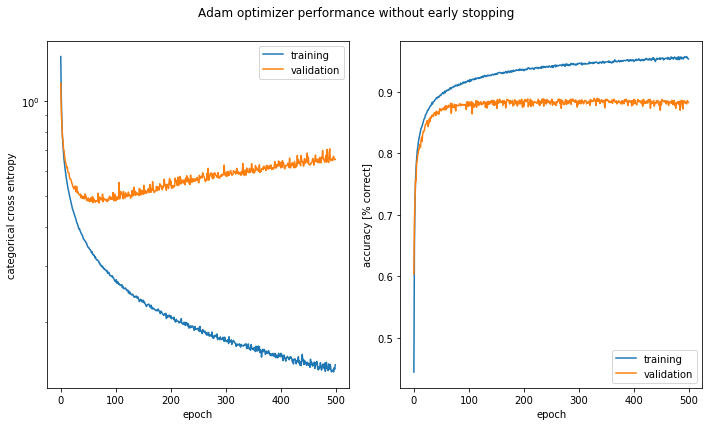

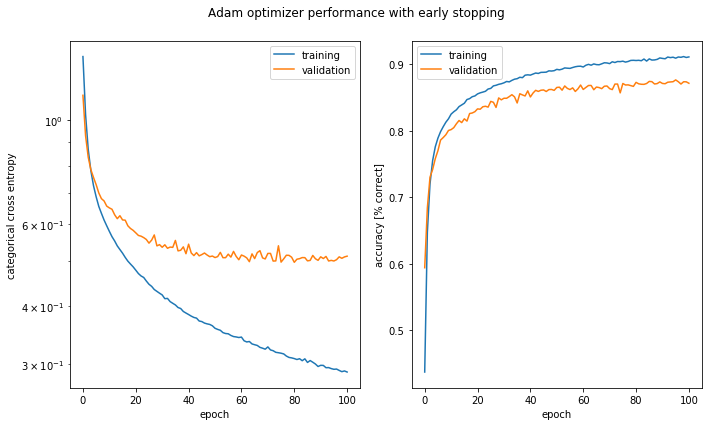

In [216]:
plot_history(hist_adam, 'Adam optimizer performance without early stopping')
plot_history(hist_adam_es, 'Adam optimizer performance with early stopping')

**Question 1**: At which epoch (approximately) does the model start to overfit? Please answer with one full sentence.

**Answer**: 

***The model starts overfitting after approximately 50 epochs.***

**Question 2**: Explain the qualitative difference between the loss curves and the accuracy curves with respect to signs of overfitting. Please answer with at most 3 full sentences.

**Answer**: 
        
***a. Concerning the loss curves, we see that at 50 epochs approximately, the validation loss starts to increase and diverge from the validation loss, which is once again a sign of overfitting.***

***b. Concerning the accuracy curves, we see that there is a significant gap between both curves, the validation accuracy is smaller compared to the training accuracy, so there is clear overfitting.***